[*********************100%***********************]  1 of 1 completed


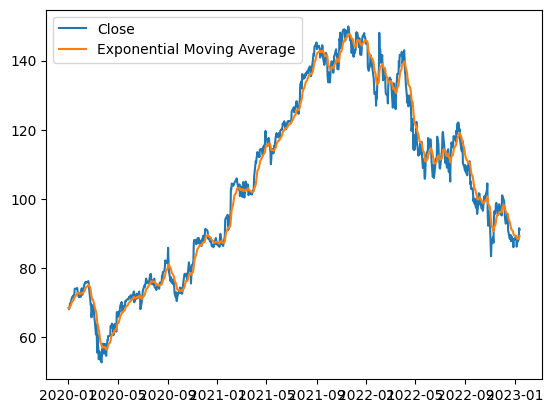

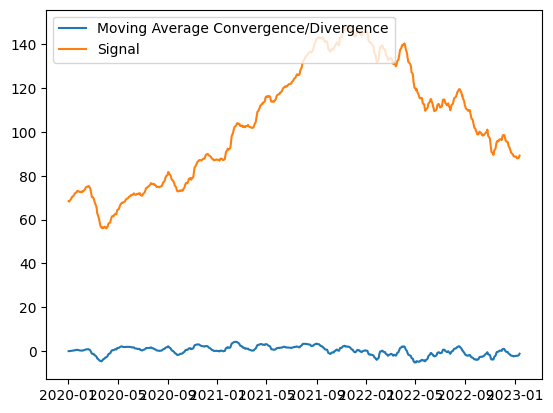

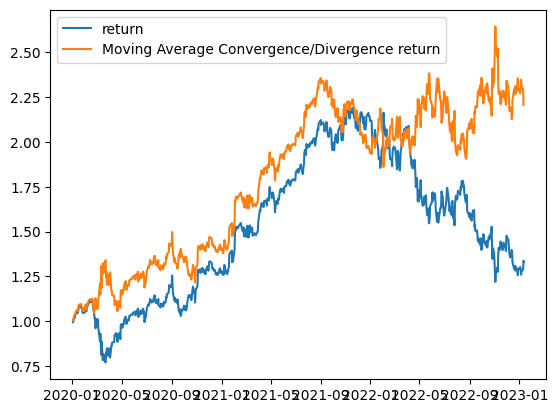

In [3]:
#importing the necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

#creating a dataframe from the dataset
stock = "GOOGL"
data = yf.download(stock, '2020-01-01', '2023-1-13')
data["return"] = data['Close'].pct_change()

#calculating the exponential moving average
ema12 = data["Close"].ewm(span=12).mean()
ema26 = data["Close"].ewm(span=26).mean()
ema9 = data["Close"].ewm(span=9).mean()

#plotting the stock price and the exponential moving average
plt.plot(data["Close"], label = "Close")
plt.plot(ema12, label = "Exponential Moving Average")
plt.legend(loc='upper left')
plt.show()

#calculating the MACD
macd = ema12 - ema26
signal = ema9
sig = 2*(macd>0)-1
data["macd_return"]=sig[:-1]*data["return"][1:]
#plotting the MACD
plt.plot(macd, label = "Moving Average Convergence/Divergence")
plt.plot(signal, label = "Signal")
plt.legend(loc='upper left')
plt.show()

plt.plot(np.cumprod(1+data['return']), label='return')
plt.plot(np.cumprod(1+data["macd_return"]), label = "Moving Average Convergence/Divergence return")
plt.legend()
plt.show()